In [107]:
using SymPy, Latexify
using Plots
using Unitful
m = u"m"; mA = u"mA"; A = u"A"; Nm = u"N*m"; rpm = u"rpm"
using RemoteREPL
@async serve_repl()

Task (failed) @0x000001e0af796ca0
IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
  [1] uv_error
    @ .\libuv.jl:100 [inlined]
  [2] #listen#13
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.4+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:628 [inlined]
  [3] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.4+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:627 [inlined]
  [4] #listen#10
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.4+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:621 [inlined]
  [5] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.4+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:618 [inlined]
  [6] #listen#12
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.4+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [7] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.4+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [

In [108]:
using Unitful, GLM, DataFramesMeta
stalcurrent = 124mA
curr2torq = 1/3A*Nm
curr2torq = 1/.336A*Nm/12
curr2torq = 1/.336A*Nm/11.5

nullcurrent = [ 33,		56,		67,		89,		101 ]mA
nullomega	= [ 15.5,	54.5,	83.5,	103,	127 ]rpm
nulldata = DataFrame(x=nullomega, y=nullcurrent * curr2torq)


r1 = 0.026m; r2 = 0.0275m; h = 0.060m;
nullk = (r2-r1)/(2π*r1^3*h)

current1 	= [ 123,	119,	102,	94.4,	90.00,	80.00,	75.5,	69.9,	62.2,	59.9,	46.6,	35.66,	29.99,	 ]mA .- nullcurrent[1]
omega1 		= [ 65.4,	64.4,	54.8,	50.5,	48.1,	42.1,	42.1,	35.1,	32.7,	30.7,	20.5,	18.6,	7.2,	 ]rpm
mu1			= @. current1*curr2torq*(r2-r1)/(2π*r1^3*h*omega1) |> upreferred

current2 	= [ 100,	93.4,	85.5,	75.5,	65.5,	59.9,	51.1,	40.0,	36.8,	30,	 ]mA .- nullcurrent[1]
omega2 		= [ 134,	111,	97.5,	88.3,	72.4,	60,		47.2,	28.5,	21.9,	9,	 ]rpm
mu2			= @. current2*curr2torq*(r2-r1)/(2π*r1^3*h*omega2) |> upreferred

current3 	= [ 87.7,	83.3,	80,		75.5,	66.6,	60,		49.9,	40,		32 ]mA .- nullcurrent[1]
omega3 		= [ 142,	108,	105,	101,	92.4,	86.5,	58.4,	39.3,	19.9 ]rpm
mu3			= @. current3*curr2torq*(r2-r1)/(2π*r1^3*h*omega3) |> upreferred
mu1

13-element Vector{Quantity{Float64, 𝐌 𝐋^-1 𝐓^-1, Unitful.FreeUnits{(kg, m^-1, s^-1), 𝐌 𝐋^-1 𝐓^-1, nothing}}}:
   0.7699085131426184 kg m^-1 s^-1
   0.7471141203104458 kg m^-1 s^-1
   0.7044381906746513 kg m^-1 s^-1
   0.6802230646941636 kg m^-1 s^-1
   0.6629856676583629 kg m^-1 s^-1
   0.6245829473997838 kg m^-1 s^-1
   0.5647824524359747 kg m^-1 s^-1
   0.5881574607238226 kg m^-1 s^-1
   0.4995850796392103 kg m^-1 s^-1
   0.4902168841227951 kg m^-1 s^-1
  0.37115849752280256 kg m^-1 s^-1
   0.0800097757349715 kg m^-1 s^-1
 -0.23388822599718687 kg m^-1 s^-1

In [109]:
using Plots, GLM, StatsModels, DataFramesMeta, Unitful
scatter(nullomega,nullcurrent)
lm(@formula(y~x),DataFrame(x=nullomega .|> upreferred |> ustrip,y=(nullcurrent*curr2torq) .|> upreferred |> ustrip))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00570802  0.00111784    5.11    0.0145  0.00215057  0.00926548
x            0.00151903  0.000124222  12.23    0.0012  0.0011237   0.00191436
─────────────────────────────────────────────────────────────────────────────

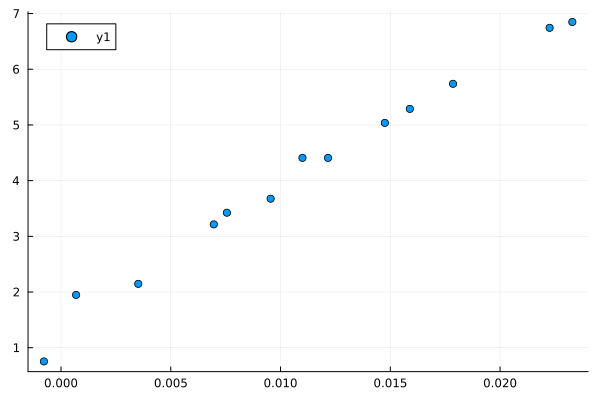

In [110]:
using Plots, Unitful, DataFramesMeta, StatsModels
scatter(current1*curr2torq .|> upreferred, omega1 .|> upreferred)
data1 = DataFrame(x=current1*curr2torq .|> upreferred |> ustrip, y=omega1 .|> upreferred |> ustrip)
fit1 = lm(@formula(x~y), data1)
mufit1 = coef(fit1)[2]*u"Pa*s*m^3" * (nullk)
data2 = DataFrame(x=current2*curr2torq .|> upreferred |> ustrip, y=omega2 .|> upreferred |> ustrip)
fit2 = lm(@formula(x~y), data2)
mufit2 = coef(fit2)[2]*u"Pa*s*m^3" * (nullk)
data3 = DataFrame(x=current3*curr2torq .|> upreferred |> ustrip, y=omega3 .|> upreferred |> ustrip)
fit3 = lm(@formula(x~y), data3)
mufit3 = coef(fit3)[2]*u"Pa*s*m^3" * (nullk)
scatter(current1*curr2torq .|> upreferred |> ustrip, omega1 .|> upreferred |> ustrip)
# mufit1
# stderror(fit1)
# fit1

In [154]:
using Unitful, GLM, StatsModels, DataFramesMeta, Statistics
stalcurrent = 124mA
curr2torq = 1/3A*Nm
curr2torq = 1/.336A*Nm/12
curr2torq = 1/.336A*Nm/11.5
curr2torq = .336Nm/A

nothingcurr = 25.44mA
k = (2.4e-2*9.8)Nm/(0.7A-nothingcurr)


nullcurrent = [ 59,		68.8,	74.4,	79,		80,		84,		87,		88,		90,		92,		90,		88,		86,		85,		82,		76,		69,		56,		54,		 ]mA .- nothingcurr
nullomega	= [ 60.2,	84.5,	102,	113,	122,	134,	141,	147,	152,	159,	148,	145,	139,	134,	125,	105,	81.8,	53.5,	50.6,	 ]rpm
nulldata = DataFrame(x=nullomega .|> upreferred |> ustrip, y=nullcurrent .|> upreferred |> ustrip)
airfit = lm(@formula(y~x), nulldata)
lin(glmfit, x) = sum(coef(glmfit) .* [1,x])


r1 = 0.026m; r2 = 0.0275m; h = 0.060m;
nullk = (r2-r1)/(2π*r1^3*h)

current1 	= [ 89,		102,	124,	146,	158,	169,	180,	191,	203,	215,	204,	187,	176,	167,	155,	146,	133,	110,	97,	73,	 ]mA .- nothingcurr
omega1 		= [ 40.2,	54.4,	66.4,	78.3,	90.6,	96.7,	103,	109,	116,	133,	129,	112,	104,	95.8,	86.7,	78.7,	69.1,	53.4,	42,	27,	 ]rpm
current1	= current1 .- lin.([airfit],omega1 .|> upreferred |> ustrip)A
mu1			= @. truecurr1*k*(r2-r1)/(2π*r1^3*h*omega1) |> upreferred

current2 	= [ 60,		113,	127,	145,	150,	160,	170,	177,	185,	190,	198,	203,	196,	191,	185,	177,	166,	155,	143,	123,	111,	86,		60,		 ]mA .- nothingcurr
omega2 		= [ 20.3,	56.4,	67.4,	76.8,	85.8,	92.8,	101,	108,	113,	116,	121,	127,	124,	120,	115,	109,	98.4,	90,		79.3,	62.5,	52.6,	38.7,	19.5,	 ]rpm
current2	= current2 .- lin.([airfit],omega2 .|> upreferred |> ustrip)A
mu2			= @. current2*k*(r2-r1)/(2π*r1^3*h*omega2) |> upreferred

current3 	= [ 88,		100,	116,	129,	136,	145,	155,	160,	163,	170,	176,	180,	182,	187,	192,	198,	200,	203,	191,	180,	175,	168,	163,	156,	148,	144,	136,	127,	108,	86,	 ]mA .- nothingcurr
omega3 		= [ 45.8,	50.5,	62.5,	70.5,	78.1,	86.3,	89.6,	93,		96.8,	102,	106,	110,	113,	117,	121,	125,	127,	136,	120,	113,	108,	105,	101,	95.3,	88.6,	84.8,	78.6,	69.8,	60,		45,	 ]rpm
current3	= current3 .- lin.([airfit],omega3 .|> upreferred |> ustrip)A
mu3			= @. current3*k*(r2-r1)/(2π*r1^3*h*omega3) |> upreferred
mu2 |> mean

0.7063271823506431 kg m^-1 s^-1

In [176]:
data1 = DataFrame(y=current1*k .|> upreferred |> ustrip, x=omega1 .|> upreferred |> ustrip)
fit1 = lm(@formula(y~x), data1)
mufit1 = coef(fit1)[2]*u"Pa*s*m^3" * (nullk)
murand1 = (coef(fit1) .\ stderror(fit1))[2]

data2 = DataFrame(y=current2*k .|> upreferred |> ustrip, x=omega2 .|> upreferred |> ustrip)
fit2 = lm(@formula(y~x), data2)
mufit2 = coef(fit2)[2]*u"Pa*s*m^3" * (nullk)
murand2 = (coef(fit2) .\ stderror(fit2))[2]

data3 = DataFrame(y=current3*k .|> upreferred |> ustrip, x=omega3 .|> upreferred |> ustrip)
fit3 = lm(@formula(y~x), data3)
mufit3 = coef(fit3)[2]*u"Pa*s*m^3" * (nullk)
murand3 = (coef(fit3) .\ stderror(fit3))[2]
mufit2
# murand2

0.7225016495150974 Pa s

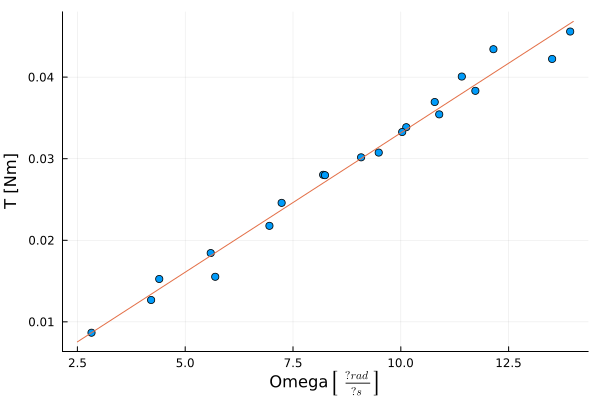

In [185]:
scatter(data1[!,:x], data1[!,:y])
xs = range(2.5,14, 100)
plot!(
	xs, lin.([fit1],xs), 
	legend=:none,
	xlabel = raw"Omega $\left[\\dfrac{\text{rad}}{\text{s}}\\right]$",
	ylabel = "T [Nm]"
)
# data1